# Paper 

## Simulados

=== Datos Generados ===
X_train:



array([[ 1.        ,  0.49671415],
       [ 1.        , -0.1382643 ],
       [ 1.        ,  0.64768854],
       [ 1.        ,  1.52302986],
       [ 1.        , -0.23415337],
       [ 1.        , -0.23413696],
       [ 1.        ,  1.57921282],
       [ 1.        ,  0.76743473],
       [ 1.        , -0.46947439],
       [ 1.        ,  0.54256004],
       [ 1.        , -0.46341769],
       [ 1.        , -0.46572975],
       [ 1.        ,  0.24196227],
       [ 1.        , -1.91328024],
       [ 1.        , -1.72491783],
       [ 1.        , -0.56228753],
       [ 1.        , -1.01283112],
       [ 1.        ,  0.31424733],
       [ 1.        , -0.90802408],
       [ 1.        , -1.4123037 ],
       [ 1.        ,  1.46564877],
       [ 1.        , -0.2257763 ],
       [ 1.        ,  0.0675282 ],
       [ 1.        , -1.42474819],
       [ 1.        , -0.54438272],
       [ 1.        ,  0.11092259],
       [ 1.        , -1.15099358],
       [ 1.        ,  0.37569802],
       [ 1.        ,

y_train:


array([-0.54411385,  0.98900339,  1.10567011,  0.66887228, -0.42496524,
        0.10503359,  0.04722053,  1.00410358,  0.025696  , -0.07050527,
       -0.60379706, -0.69277838,  1.04343441,  2.41709432,  0.91630914,
        1.54414383,  1.07574331, -0.44204686,  1.03514356,  2.40597367,
       -0.27613744,  1.97567008, -2.32166505,  1.69463175,  0.62076318,
       -0.0176377 ,  0.85907198, -1.80815959,  0.3357074 ,  0.79352264,
        2.03368457, -0.90746576, -0.47921209,  0.22963266,  0.92273862,
        1.12296034, -0.2861059 ,  1.59198564,  0.93262243,  1.21692119,
       -0.66233952, -0.06956907, -0.02349008, -1.02348128,  1.18955687,
        0.86233849,  0.50658125, -0.3175822 , -1.22360809,  0.58235417])


x_test: [[-0.34271452 -0.80227727]]
true_y: [-0.16128571]

=== Cálculo de C_i ===
C_1: -0.22
C_2: 1.01
C_3: 1.61
C_4: 1.72
C_5: -0.50
C_6: 0.05
C_7: 1.07
C_8: 1.58
C_9: -0.16
C_10: 0.31
C_11: -0.80
C_12: -0.90
C_13: 1.29
C_14: 1.47
C_15: 0.04
C_16: 1.34
C_17: 0.60
C_18: -0.21
C_19: 0.62
C_20: 1.74
C_21: 0.64
C_22: 1.98
C_23: -2.29
C_24: 1.00
C_25: 0.40
C_26: 0.12
C_27: 0.30
C_28: -1.60
C_29: 0.08
C_30: 0.72
C_31: 1.81
C_32: 0.17
C_33: -0.43
C_34: -0.28
C_35: 1.53
C_36: 0.53
C_37: -0.11
C_38: 0.60
C_39: 0.28
C_40: 1.45
C_41: -0.21
C_42: 0.10
C_43: -0.02
C_44: -1.15
C_45: 0.46
C_46: 0.55
C_47: 0.33
C_48: 0.35
C_49: -1.01
C_50: -0.32

=== C_i ordenados ===
[-2.29 -1.6  -1.15 -1.01 -0.9  -0.8  -0.5  -0.43 -0.32 -0.28 -0.22 -0.21
 -0.21 -0.16 -0.11 -0.02  0.04  0.05  0.08  0.1   0.12  0.17  0.28  0.3
  0.31  0.33  0.35  0.4   0.46  0.53  0.55  0.6   0.6   0.62  0.64  0.72
  1.    1.01  1.07  1.29  1.34  1.45  1.47  1.53  1.58  1.61  1.72  1.74
  1.81  1.98]

=== Construyendo distribución e

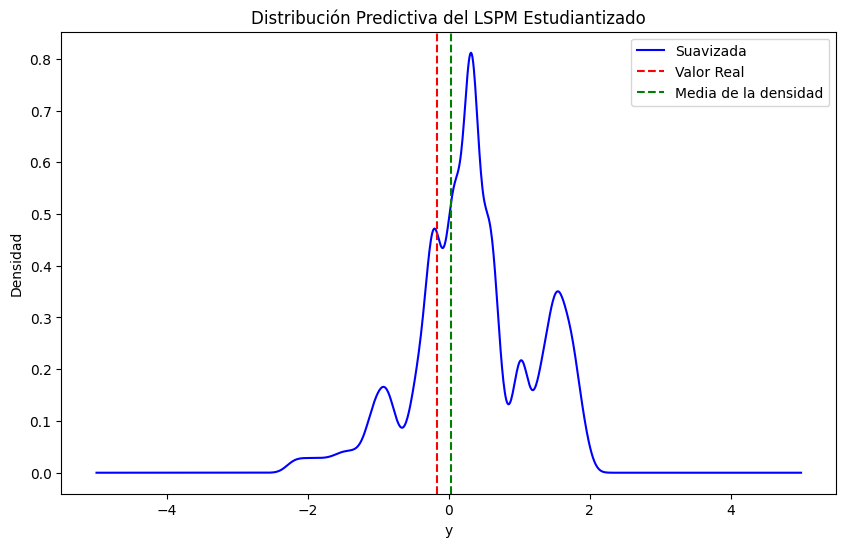

In [8]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def generate_synthetic_data(n, p, seed=42):
    """Genera datos sintéticos para regresión."""
    np.random.seed(seed)
    X = np.random.randn(n, p)
    X = np.concatenate((np.ones((n, 1)), X), axis=1)
    true_w = np.random.randn(p + 1)
    y = X @ true_w + np.random.randn(n)
    return X, y

def compute_hat_matrix(X):
    """Calcula la matriz hat."""
    return X @ np.linalg.inv(X.T @ X) @ X.T

def compute_A_and_B(X_full, y_train, i):
    """Calcula A_i y B_i corregidos."""
    n = len(y_train)
    hat_matrix = compute_hat_matrix(X_full)
    
    # Término 1 de A_i: sum( h_{j,n+1} * y_j ) / sqrt(1 - h_{n+1,n+1})
    sum_term1 = np.sum([hat_matrix[j, n] * y_train[j] for j in range(n)]) / np.sqrt(1 - hat_matrix[n, n])
    
    # Término 2 de A_i: (y_i - sum( h_{i,j} * y_j )) / sqrt(1 - h_{i,i})
    y_hat_i = np.sum([hat_matrix[i, j] * y_train[j] for j in range(n)])
    term2 = (y_train[i] - y_hat_i) / np.sqrt(1 - hat_matrix[i, i])
    
    A_i = sum_term1 + term2
    B_i = np.sqrt(1 - hat_matrix[n, n]) + (hat_matrix[i, n] / np.sqrt(1 - hat_matrix[i, i]))
    
    return A_i, B_i

def compute_predictive_density(X_train, y_train, x_test, true_y, y_range, plot=False, sigma=10):
    """Calcula y visualiza la densidad predictiva."""
    X_full = np.concatenate((X_train, x_test.reshape(1, -1)), axis=0)
    n_train = len(y_train)
    C = []
    
    print("\n=== Cálculo de C_i ===")
    for i in range(n_train):
        A_i, B_i = compute_A_and_B(X_full, y_train, i)
        C_i = A_i / B_i if B_i != 0 else np.inf
        C.append(C_i)
        print(f"C_{i+1}: {C_i:.2f}")
    
    C_sorted = np.sort(C)
    print("\n=== C_i ordenados ===")
    print(np.round(C_sorted, 2))
    
    # Crear intervalos
    quantiles = [-np.inf] + C_sorted.tolist() + [np.inf]
    probabilities = np.linspace(0, 1, n_train + 2)
    
    # Calcular densidad escalonada
    y_values = np.linspace(y_range[0], y_range[1], 1000)
    density = np.zeros_like(y_values)
    
    print("\n=== Construyendo distribución escalonada ===")
    for idx, y in enumerate(y_values):
        for i in range(len(quantiles) - 1):
            if quantiles[i] <= y < quantiles[i+1]:
                density[idx] = (probabilities[i+1] - probabilities[i]) / (quantiles[i+1] - quantiles[i])
                break
    
    # Suavizado
    density_smooth = gaussian_filter1d(density, sigma=sigma)
    
    if plot:
        
        plt.figure(figsize=(10, 6))
        plt.plot(y_values, density_smooth, label='Suavizada', color='blue')
        plt.axvline(true_y, color='r', linestyle='--', label='Valor Real')
        # grafca la media de la densidad
        mean_density = np.mean(y_values * density_smooth) 
        plt.axvline(mean_density, color='g', linestyle='--', label='Media de la densidad')
        plt.title("Distribución Predictiva del LSPM Estudiantizado")
        plt.xlabel("y")
        plt.ylabel("Densidad")
        plt.legend()
        plt.show()
    
    return y_values, density_smooth

if __name__ == "__main__":
    np.random.seed(40)
    n = 50
    p = 1
    X_train, y_train = generate_synthetic_data(n, p)
    x_test = np.random.randn(1, p+1)
    true_y = np.random.randn(1)
    
    print("=== Datos Generados ===")
    print("X_train:\n")
    display(X_train)
    print("y_train:")
    display(y_train)
    print("\nx_test:", x_test)
    print("true_y:", true_y)
    
    y_range = (-5, 5)
    y_values, density = compute_predictive_density(X_train, y_train, x_test, true_y, y_range, plot=True, sigma=10)

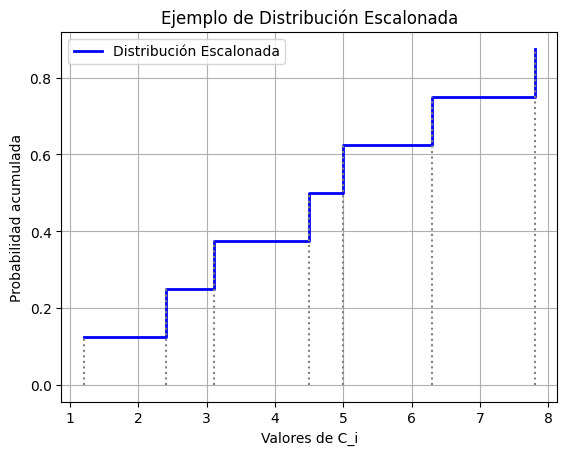

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de C_i ordenados
C_values = np.array([1.2, 2.4, 3.1, 4.5, 5.0, 6.3, 7.8])

# Probabilidades acumuladas P(C ≤ C_i)
n = len(C_values)
probabilities = np.arange(1, n+1) / (n+1)

# Crear la función escalonada
plt.step(C_values, probabilities, where='post', label="Distribución Escalonada", linewidth=2, color='b')

# Agregar líneas verticales para resaltar los escalones
for x, y in zip(C_values, probabilities):
    plt.vlines(x, 0, y, linestyles="dotted", colors='gray')

# Etiquetas y título
plt.xlabel("Valores de C_i")
plt.ylabel("Probabilidad acumulada")
plt.title("Ejemplo de Distribución Escalonada")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


## Datos reales

# Prueba Temporal

In [9]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from dataclasses import dataclass
from typing import Tuple, Optional
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from functools import partial

@dataclass
class PredictiveModels:
    rho: float = 0.95
    random_state: int = 42
    n_boot: int = 500
    
    def __post_init__(self):
        np.random.seed(self.random_state)
        self.results_df = None
    
    def _weighted_regression(self, X: np.ndarray, Y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """Optimized weighted regression using matrix operations."""
        W = np.diag(w)
        return np.linalg.solve(X.T @ W @ X, X.T @ W @ Y)
    
    def _calculate_residuals(self, X: np.ndarray, Y: np.ndarray, beta: np.ndarray, 
                           sigma: float, w: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """Efficient calculation of normalized and permuted residuals."""
        norm_residuals = np.abs(Y - X @ beta) / sigma
        
        # Vectorized permutation
        K = np.random.choice(len(Y), p=w)
        Y_perm = Y.copy()
        Y_perm[K], Y_perm[-1] = Y_perm[-1], Y_perm[K]
        perm_residuals = np.abs(Y_perm - X @ beta)
        
        return norm_residuals, perm_residuals
    
    def _crps(self, predictions: np.ndarray, y_real: float) -> float:
        """Vectorized CRPS calculation."""
        return float(np.mean((predictions - y_real) ** 2))
    
    def conformal_prediction(self, X: np.ndarray, Y: np.ndarray, X_new: np.ndarray, 
                           Y_real: float) -> Tuple[np.ndarray, float, float]:
        """Optimized conformal prediction."""
        n = len(Y)
        w = self.rho ** (n - np.arange(n))
        w /= w.sum()
        
        sigma = Y.std()
        beta = self._weighted_regression(X, Y, w)
        B_i, C_i = self._calculate_residuals(X, Y, beta, sigma, w)
        
        # Vectorized prediction distribution
        P_pred = (w[:, None] * (B_i[:, None] + C_i[None, :])).sum(axis=0) / w.sum()
        crps = self._crps(P_pred, Y_real)
        
        return P_pred, P_pred.mean(), crps
    
    def bootstrap_prediction(self, Y: np.ndarray, Y_real: float, 
                           steps: int = 1) -> Tuple[np.ndarray, float, float]:
        """Parallel bootstrap prediction."""
        model = ARIMA(Y, order=(1, 0, 1)).fit()
        predictions = model.forecast(steps=steps)
        residuals = model.resid
        
        def _single_bootstrap(seed: int) -> np.ndarray:
            rng = np.random.RandomState(seed)
            sample_residuals = rng.choice(residuals, size=steps, replace=True)
            return predictions + sample_residuals
        
        # Parallel bootstrap iterations
        with ThreadPoolExecutor() as executor:
            boot_predictions = list(executor.map(_single_bootstrap, 
                                              range(self.random_state, 
                                                    self.random_state + self.n_boot)))
        
        boot_predictions = np.array(boot_predictions).flatten()
        return boot_predictions, boot_predictions.mean(), self._crps(boot_predictions, Y_real)
    
    def plot_distributions(self, P_conf: np.ndarray, P_boot: np.ndarray, 
                         Y_real: float) -> None:
        """Enhanced visualization using seaborn."""
        plt.figure(figsize=(12, 7))
        sns.kdeplot(data=P_conf, label='Conformal', color='blue', alpha=0.6)
        sns.kdeplot(data=P_boot, label='Bootstrap', color='green', alpha=0.6)
        
        plt.axvline(P_conf.mean(), color='blue', linestyle='--', 
                   label='Media Conformal', alpha=0.8)
        plt.axvline(P_boot.mean(), color='green', linestyle='--', 
                   label='Media Bootstrap', alpha=0.8)
        plt.axvline(Y_real, color='red', label='Valor Real', alpha=0.8)
        
        plt.title('Comparación de Densidades Predictivas', fontsize=12)
        plt.xlabel('Valor Predicho', fontsize=10)
        plt.ylabel('Densidad', fontsize=10)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def simulate_and_compare(self, n_samples: int = 100) -> pd.DataFrame:
        """Generate data and run both prediction methods."""
        X = np.c_[np.ones(n_samples), np.linspace(0, 10, n_samples)]
        Y = 2 * X[:, 1] + np.random.normal(0, 2, n_samples)
        X_new = np.array([1, 10])
        Y_real = 2 * X_new[1] + np.random.normal(0, 2)
        
        P_conf, mean_conf, crps_conf = self.conformal_prediction(X, Y, X_new, Y_real)
        P_boot, mean_boot, crps_boot = self.bootstrap_prediction(Y, Y_real)
        
        self.plot_distributions(P_conf, P_boot, Y_real)
        
        # Create results DataFrame
        self.results_df = pd.DataFrame({
            'Método': ['Predicción Conforme', 'Bootstrap Residuals'],
            'Media': [mean_conf, mean_boot],
            'CRPS': [crps_conf, crps_boot],
            'Valor Real': [Y_real, Y_real]
        }).set_index('Método')
        
        return self.results_df



/home/plealm/Documentos/Unal/Maestria/Tesis/code/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


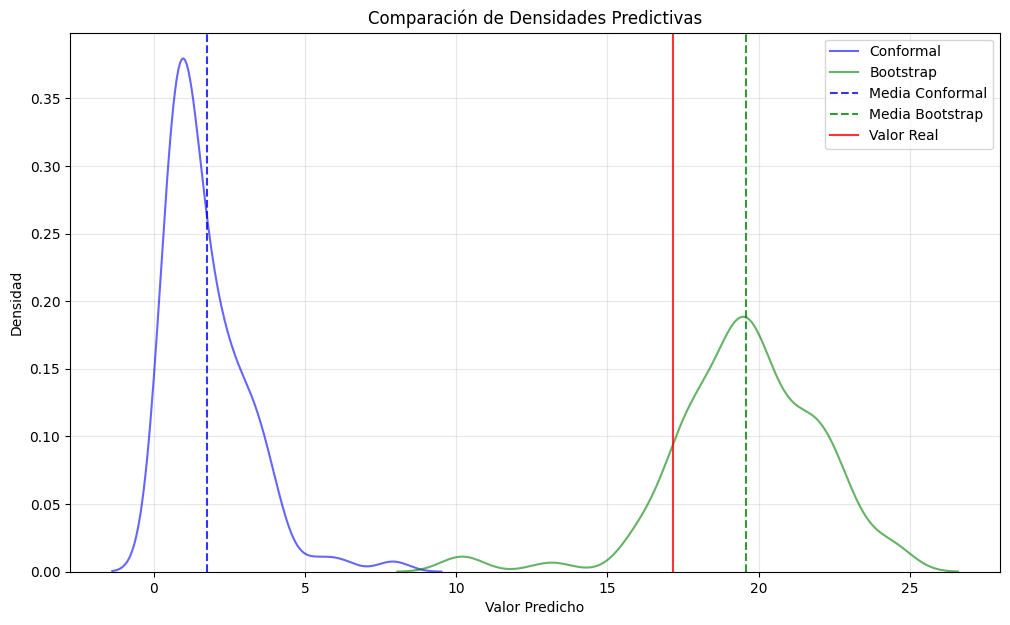

,Media,CRPS,Valor Real
Método,,,
Predicción Conforme,1.7592,239.2424,17.1693
Bootstrap Residuals,19.5707,11.8853,17.1693


In [14]:
# Ejemplo de uso en Jupyter Notebook
predictor = PredictiveModels(rho=0.95, random_state=42, n_boot=500)
results = predictor.simulate_and_compare(n_samples=100)
display(results.style.format({
    'Media': '{:.4f}',
    'CRPS': '{:.4f}',
    'Valor Real': '{:.4f}'
}).set_caption("Resultados de Predicción"))

In [35]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from dataclasses import dataclass
from typing import Tuple, Optional, Dict
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime, timedelta
from itertools import product
import warnings
warnings.filterwarnings('ignore')

@dataclass
class TimeSeriesPredictor:
    rho: float = 0.95
    random_state: int = 42
    n_boot: int = 500
    train_size: float = 0.8
    
    def __post_init__(self):
        np.random.seed(self.random_state)
        self.results_df = None
        self.best_model = None
        self.best_model_params = None
        self.model_type = None
        
    def _find_best_model(self, train_data: np.ndarray) -> Tuple[object, Dict, str]:
        """
        Encuentra el mejor modelo entre ARIMA y ETS basado en AIC.
        """
        best_aic = np.inf
        best_model = None
        best_params = None
        best_type = None
        
        # Parámetros ARIMA a probar
        p_values = range(0, 3)
        d_values = range(0, 2)
        q_values = range(0, 3)
        
        # Probar modelos ARIMA
        for p, d, q in product(p_values, d_values, q_values):
            try:
                model = ARIMA(train_data, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_model = results
                    best_params = {'order': (p, d, q)}
                    best_type = 'ARIMA'
            except:
                continue
        
        # Parámetros ETS a probar
        trend_types = ['add', 'mul', None]
        seasonal_types = ['add', 'mul', None]
        damped_trend = [True, False]
        
        # Probar modelos ETS
        for trend, seasonal, damped in product(trend_types, seasonal_types, damped_trend):
            if trend is None and damped:
                continue
            try:
                model = ExponentialSmoothing(
                    train_data,
                    trend=trend,
                    damped_trend=damped if trend else False,
                    seasonal=seasonal,
                    seasonal_periods=12
                )
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_model = results
                    best_params = {
                        'trend': trend,
                        'seasonal': seasonal,
                        'damped_trend': damped if trend else False
                    }
                    best_type = 'ETS'
            except:
                continue
                
        print(f"Mejor modelo seleccionado: {best_type}")
        print(f"Parámetros: {best_params}")
        return best_model, best_params, best_type
    
    def plot_time_series(self, train_df: pd.DataFrame, test_df: pd.DataFrame,
                        date_column: str, value_column: str, show_predictions=False) -> None:
        """
        Visualiza la serie temporal con predicciones.
        """
        plt.figure(figsize=(15, 8))
        
        # Datos de entrenamiento
        plt.plot(train_df[date_column], train_df[value_column], 
                label='Datos de Entrenamiento', color='blue', alpha=0.6)
        
        # Datos de prueba
        plt.plot(test_df[date_column], test_df[value_column], 
                label='Datos de Prueba', color='red', alpha=0.8)
        
        # Predicciones si están disponibles
        if show_predictions and hasattr(self, 'results_df') and self.results_df is not None:
            conf_mean = self.results_df.loc['Predicción Conforme', 'Media']
            boot_mean = self.results_df.loc['Bootstrap Residuals', 'Media']
            test_date = test_df[date_column].iloc[0]
            
            plt.scatter(test_date, conf_mean, color='green', 
                       label='Predicción Conforme', s=100, zorder=5)
            plt.scatter(test_date, boot_mean, color='purple', 
                       label='Predicción Bootstrap', s=100, zorder=5)
        
        plt.title('Serie Temporal con Predicciones', fontsize=14)
        plt.xlabel('Fecha', fontsize=12)
        plt.ylabel('Valor', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()

    def prepare_time_data(self, df: pd.DataFrame, 
                         date_column: str, 
                         value_column: str,
                         forecast_steps: int = 1) -> Tuple[pd.DataFrame, pd.DataFrame]:
        df = df.sort_values(date_column).copy()
        
        if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
            df[date_column] = pd.to_datetime(df[date_column])
            
        n_train = int(len(df) * self.train_size)
        train_df = df.iloc[:n_train]
        test_df = df.iloc[n_train:n_train + forecast_steps]
        
        return train_df, test_df
    
    def _prepare_conformal_inputs(self, train_df: pd.DataFrame, 
                                date_column: str, 
                                value_column: str) -> Tuple[np.ndarray, np.ndarray]:
        dates = train_df[date_column].values
        days_since_start = (dates - dates.min()).astype('timedelta64[D]').astype(float)
        
        X = np.column_stack([
            np.ones(len(train_df)),
            days_since_start,
            np.sin(2 * np.pi * days_since_start / 365.25),
            np.cos(2 * np.pi * days_since_start / 365.25),
            np.sin(4 * np.pi * days_since_start / 365.25),
            np.cos(4 * np.pi * days_since_start / 365.25)
        ])
        
        Y = train_df[value_column].values
        self.y_mean = Y.mean()
        self.y_std = Y.std()
        Y_norm = (Y - self.y_mean) / self.y_std
        
        return X, Y_norm
    
    def _weighted_regression(self, X: np.ndarray, Y: np.ndarray, w: np.ndarray) -> np.ndarray:
        W = np.diag(w)
        return np.linalg.solve(X.T @ W @ X, X.T @ W @ Y)
    
    def _calculate_residuals(self, X: np.ndarray, Y: np.ndarray, beta: np.ndarray, 
                           w: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        Y_pred = X @ beta
        residuals = Y - Y_pred
        
        n_segments = 10
        segment_size = len(Y) // n_segments
        Y_perm = Y.copy()
        
        for i in range(n_segments):
            start_idx = i * segment_size
            end_idx = start_idx + segment_size if i < n_segments-1 else len(Y)
            segment_indices = np.arange(start_idx, end_idx)
            np.random.shuffle(segment_indices)
            Y_perm[start_idx:end_idx] = Y[segment_indices]
        
        perm_residuals = Y_perm - Y_pred
        return residuals, perm_residuals
    
    def _crps(self, predictions: np.ndarray, y_real: float) -> float:
        return float(np.mean((predictions - y_real) ** 2))
    
    def conformal_prediction(self, train_df: pd.DataFrame, test_df: pd.DataFrame,
                           date_column: str, value_column: str) -> Tuple[np.ndarray, float, float]:
        X, Y = self._prepare_conformal_inputs(train_df, date_column, value_column)
        
        test_days = (test_df[date_column].iloc[0] - train_df[date_column].min()).days
        X_new = np.array([
            1,
            float(test_days),
            np.sin(2 * np.pi * test_days / 365.25),
            np.cos(2 * np.pi * test_days / 365.25),
            np.sin(4 * np.pi * test_days / 365.25),
            np.cos(4 * np.pi * test_days / 365.25)
        ])
        
        n = len(Y)
        w = self.rho ** (n - np.arange(n))
        w /= w.sum()
        
        beta = self._weighted_regression(X, Y, w)
        residuals, perm_residuals = self._calculate_residuals(X, Y, beta, w)
        
        y_pred_norm = X_new @ beta
        n_samples = 1000
        noise_scale = np.std(residuals)
        P_pred_norm = np.random.normal(y_pred_norm, noise_scale, n_samples)
        P_pred = P_pred_norm * self.y_std + self.y_mean
        
        Y_real = test_df[value_column].iloc[0]
        crps = self._crps(P_pred, Y_real)
        
        return P_pred, float(P_pred.mean()), crps
    
    def bootstrap_prediction(self, train_df: pd.DataFrame, test_df: pd.DataFrame,
                           value_column: str, steps: int = 1) -> Tuple[np.ndarray, float, float]:
        Y = train_df[value_column].values
        Y_real = test_df[value_column].iloc[0]
        
        # Encontrar el mejor modelo si aún no se ha hecho
        if self.best_model is None:
            self.best_model, self.best_model_params, self.model_type = self._find_best_model(Y)
        
        predictions = self.best_model.forecast(steps=steps)
        residuals = self.best_model.resid
        
        def _single_bootstrap(seed: int) -> np.ndarray:
            rng = np.random.RandomState(seed)
            sample_residuals = rng.choice(residuals, size=steps, replace=True)
            return predictions + sample_residuals
        
        with ThreadPoolExecutor() as executor:
            boot_predictions = list(executor.map(_single_bootstrap, 
                                              range(self.random_state, 
                                                    self.random_state + self.n_boot)))
        
        boot_predictions = np.array(boot_predictions).flatten()
        return boot_predictions, boot_predictions.mean(), self._crps(boot_predictions, Y_real)
    
    def plot_distributions(self, P_conf: np.ndarray, P_boot: np.ndarray, 
                         Y_real: float, date: pd.Timestamp) -> None:
        plt.figure(figsize=(12, 7))
        
        sns.kdeplot(data=P_conf, label='Conformal', color='blue', alpha=0.6, bw_adjust=0.5)
        sns.kdeplot(data=P_boot, label='Bootstrap', color='green', alpha=0.6, bw_adjust=0.5)
        
        plt.axvline(P_conf.mean(), color='blue', linestyle='--', 
                   label='Media Conformal', alpha=0.8)
        plt.axvline(P_boot.mean(), color='green', linestyle='--', 
                   label='Media Bootstrap', alpha=0.8)
        plt.axvline(Y_real, color='red', label='Valor Real', alpha=0.8)
        
        plt.title(f'Densidades Predictivas para {date.strftime("%Y-%m-%d")}', fontsize=12)
        plt.xlabel('Valor Predicho', fontsize=10)
        plt.ylabel('Densidad', fontsize=10)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def predict(self, df: pd.DataFrame, 
                date_column: str, 
                value_column: str,
                forecast_steps: int = 1) -> pd.DataFrame:
        train_df, test_df = self.prepare_time_data(df, date_column, value_column, forecast_steps)
        
       
        
        P_conf, mean_conf, crps_conf = self.conformal_prediction(
            train_df, test_df, date_column, value_column
        )
        
        P_boot, mean_boot, crps_boot = self.bootstrap_prediction(
            train_df, test_df, value_column
        )
        
        self.results_df = pd.DataFrame({
            'Método': ['Predicción Conforme', 'Bootstrap Residuals'],
            'Media': [mean_conf, mean_boot],
            'CRPS': [crps_conf, crps_boot],
            'Valor Real': [test_df[value_column].iloc[0], test_df[value_column].iloc[0]],
            'Fecha Predicción': [test_df[date_column].iloc[0], test_df[date_column].iloc[0]]
        }).set_index('Método')
        
         # Graficar serie temporal después de calcular los resultados
        self.plot_time_series(train_df, test_df, date_column, value_column, show_predictions=True)
        self.plot_distributions(P_conf, P_boot, test_df[value_column].iloc[0],
                              test_df[date_column].iloc[0])
        
        return self.results_df

Mejor modelo seleccionado: ETS
Parámetros: {'trend': 'add', 'seasonal': 'mul', 'damped_trend': False}


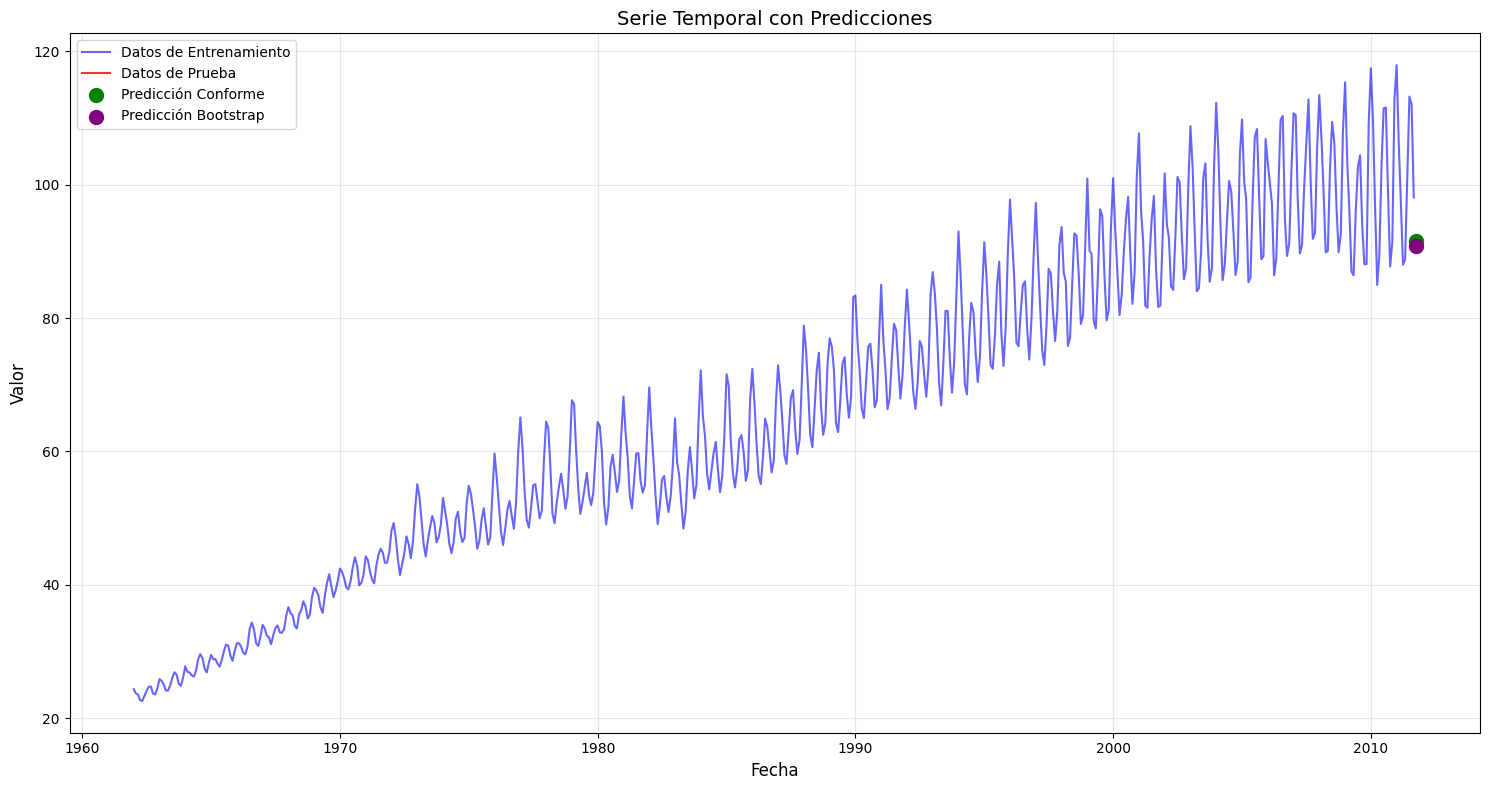

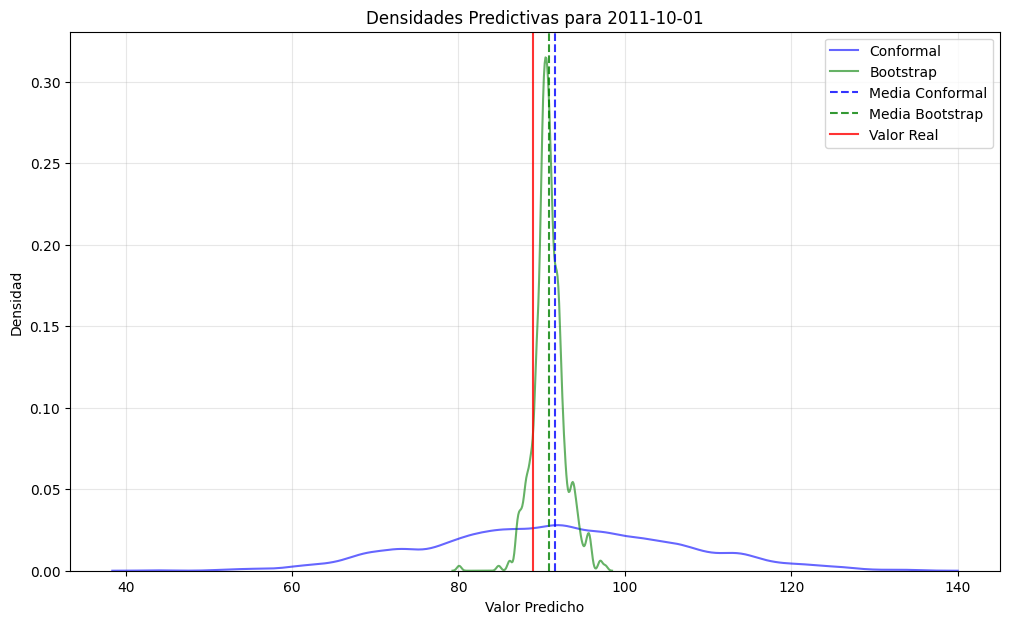

,Media,CRPS,Valor Real,Fecha Predicción
Método,,,,
Predicción Conforme,91.5824,223.5293,88.9858,2011-10-01
Bootstrap Residuals,90.8648,6.9249,88.9858,2011-10-01


In [36]:

# Ejemplo de uso:

# Crear predictor
predictor = TimeSeriesPredictor(rho=0.95, n_boot=500)

# Supongamos que tienes un DataFrame con columnas 'fecha' y 'valor'
df = pd.read_csv("../../data/IPG2211A2N.csv")
df = df.rename(columns={'DATE': 'fecha', 'IPG2211A2N': 'valor'})
df = df[df['valor'].notnull()].reset_index(drop=True)
df['fecha'] = pd.to_datetime(df['fecha'])
df = pd.DataFrame({
    'fecha': pd.date_range(start=df['fecha'].min(), periods=len(df), freq='MS'),
    'valor': df['valor'].values
})
# Realizar predicción
results = predictor.predict(df, 'fecha', 'valor')
display(results.style.format({
    'Media': '{:.4f}',
    'CRPS': '{:.4f}',
    'Valor Real': '{:.4f}',
    'Fecha Predicción': '{:%Y-%m-%d}'
}).set_caption("Resultados de Predicción"))
